In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random,os

from sklearn.model_selection import train_test_split

from keras.utils import to_categorical
import tensorflow as tf
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
data = []
for img in os.listdir('original'):
    arr = cv2.resize(cv2.imread(os.path.join('original',img),0),(32,32)).flatten()
    arr = np.append(arr,img.split('-')[0])
    data.append(arr)

In [ ]:
df = pd.DataFrame(data)
df = df.rename(columns={1024:'label'})

data.to_csv('digit_data.csv',index=False)

In [3]:
digit = pd.read_csv('/content/digit_data.csv')
digit.shape

(12213, 1025)

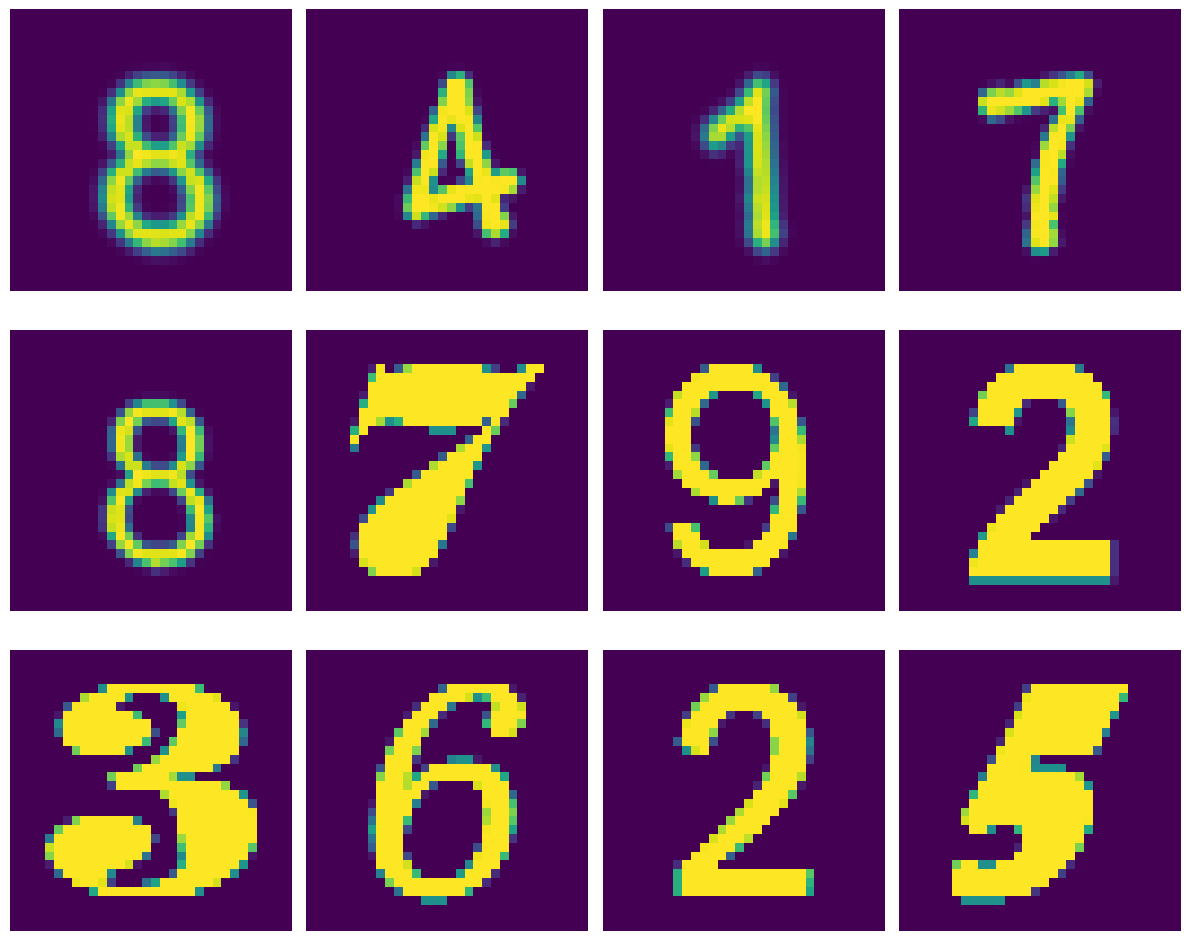

In [32]:
dete = digit.drop('label',axis=1)
fig,axes = plt.subplots(3,4,figsize=(12,10))
axs = axes.ravel()
random_num = random.sample(range(dete.shape[0]),12)
for i,num in enumerate(random_num):
  axs[i].imshow(dete.iloc[num].values.reshape(32,32).astype(float))
  axs[i].axis('off')

plt.tight_layout()
plt.show()

In [6]:
image = digit.drop('label',axis=1)
label = digit['label']

In [7]:
print('Previous Labels - ',label.unique())
label = label-1
print('Current Labels - ',label.unique())

Previous Labels -  [1 2 3 4 5 6 7 8 9]
Current Labels -  [0 1 2 3 4 5 6 7 8]


In [8]:
x_train,x_val,y_train,y_val = train_test_split(image,label,test_size=0.2,random_state=42)
x_train.shape ,x_val.shape ,y_train.shape ,y_val.shape

((9770, 1024), (2443, 1024), (9770,), (2443,))

In [9]:
x_train = x_train/255.0
x_val = x_val/255.0

x_train = x_train.values.reshape(-1,32,32,1)
x_val = x_val.values.reshape(-1,32,32,1)

In [10]:
y_train = to_categorical(y_train,num_classes=9)
y_val = to_categorical(y_val,num_classes=9)

In [11]:
x_train.shape ,x_val.shape ,y_train.shape ,y_val.shape

((9770, 32, 32, 1), (2443, 32, 32, 1), (9770, 9), (2443, 9))

In [12]:
model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(32, 32, 1)),
        tf.keras.layers.Conv2D(64, (2, 2), activation="relu", padding="same"),
        tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.Conv2D(128, (2, 2), activation="relu", padding="same"),
        tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.Conv2D(256, (2, 2), activation="relu", padding="same"),
        tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(9, activation="softmax")
    ])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 128)         │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 256)           │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,048,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 9)                   │             585 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,255,113 (4.79 MB)

 Trainable params: 1,255,113 (4.79 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
model.fit(x_train,y_train,epochs=20,validation_data=(x_val,y_val))

Epoch 1/20
306/306 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.6721 - loss: 0.8601 - val_accuracy: 0.9816 - val_loss: 0.0510
Epoch 2/20
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9804 - loss: 0.0642 - val_accuracy: 0.9873 - val_loss: 0.0466
Epoch 3/20
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9900 - loss: 0.0366 - val_accuracy: 0.9877 - val_loss: 0.0394
Epoch 4/20
306/306 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9933 - loss: 0.0212 - val_accuracy: 0.9918 - val_loss: 0.0371
Epoch 5/20
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9953 - loss: 0.0163 - val_accuracy: 0.9898 - val_loss: 0.0342
Epoch 6/20
306/306 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9945 - loss: 0.0204 - val_accuracy: 0.9873 - val_loss: 0.0345
Epoch 7/20
306/306 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9893 - loss: 0.0361 - val_accuracy: 0.9873 - val_loss: 0.0461
Epoch 8/20
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9948 - loss: 0.0130 - val_accuracy: 

In [15]:
model.save_weights('final_digit_recog_iter1.weights.h5')